#### If you're seeking insights into hyperparameter tuning for logistic regression, this notebook will certainly provide valuable information. Instead of focusing solely on the dataset used, pay close attention to how parameter tuning can significantly enhance our model's performance. Understanding the benefits of parameter tuning is key to improving the effectiveness of logistic regression in various applications.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gender/gender_classification_v7.csv


In [2]:
#Import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the File
df=pd.read_csv("/kaggle/input/gender/gender_classification_v7.csv") 

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


This dataset contains 7 features and a label column:

- <b>`long_hair`</b>: This column contains 0's and 1's where 1 represents "long hair" and 0 represents "not long hair".

- <b>`forehead_width_cm`</b>: This column is in centimeters (CM) and represents the width of the forehead.

- <b>`forehead_height_cm`</b>: This column is in centimeters (CM) and represents the height of the forehead.

- <b>`nose_wide`</b>: This column contains 0's and 1's where 1 represents "wide nose" and 0 represents "not wide nose".

- <b>`nose_long`</b>: This column contains 0's and 1's where 1 represents "long nose" and 0 represents "not long nose".

- <b>`lips_thin`</b>: This column contains 0's and 1's where 1 represents "thin lips" and 0 represents "not thin lips".

- <b>`distance_nose_to_lip_long`</b>: This column contains 0's and 1's where 1 represents "long distance between nose and lips" and 0 represents "short distance between nose and lips".

- <b>`gender`</b>: This column represents the gender and can be either "Male" or "Female".


In [5]:
df.shape

(5001, 8)

In [6]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
df.dtypes  

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [8]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


#### Let's detect if there are any outliers. To understand if outliers exist, let's assess human autonomy.

##### For forehead_width_cm & forehead_height_cm
For men, the average forehead height is approximately 2.4 inches (6 cm) with a standard deviation of 0.4 inches. The width of a standard-sized forehead falls within the range of <b>4.7 to 6.1 inches (12 to 15.5 cm). </b>
<br><br>
For women, the average forehead height is around 2.3 inches (5.8 cm) with a deviation of 0.3 inches. The width of a typical female forehead is about <b>5.1 inches (12.9 cm) with a deviation of 0.7 inches</b>

Source:  https://huyhoa.net/en/average-forehead-size/

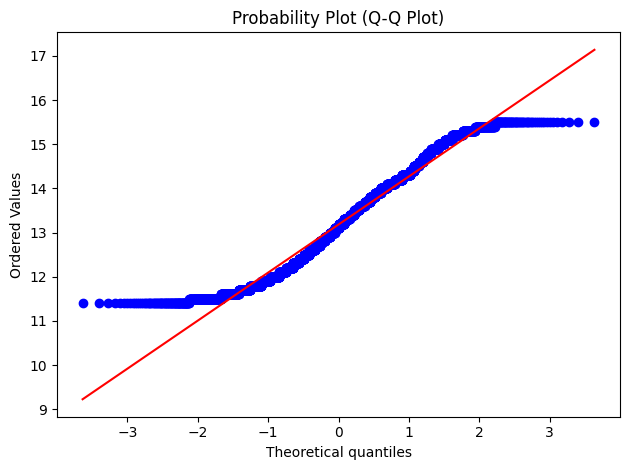

In [9]:
import scipy.stats as stats


# Probability Plot (Q-Q plot)
plt.plot()
stats.probplot(df.forehead_width_cm, dist="norm", plot=plt)
plt.title('Probability Plot (Q-Q Plot)')

plt.tight_layout()
plt.show()
#we can use Histogram too, but i prefer Q-Q plot as its quite simple to understand

When we notice that points deviate from a straight line in the Q-Q plot, it means that the data do not  follow a normal distribution.Still, to delve deeper into understanding the distribution of the data, we can explore additional statistical methods.

In [10]:
mean = df.forehead_width_cm.mean()
std_dev = df.forehead_width_cm.std()

# Normality using Shapiro-Wilk test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df.forehead_width_cm)
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)
if shapiro_p_value < 0.05:
    print("Reject null hypothesis: Data is not normally distributed")
else:
    print("\nFail to reject null hypothesis: Data may be normally distributed")

    
"""It should be noted that Shapiro-Wilk test directly tests the normality hypothesis, 
 while the KS test compares the data distribution with a reference distribution, typically normal, 
 without assuming a specific distribution for the data. """
    
    
# Normality using Kolmogorov-Smirnov test
ks_test_statistic, ks_p_value = stats.kstest(df.forehead_width_cm, 'norm', args=(mean, std_dev))
print("Kolmogorov-Smirnov Test Statistic:", ks_test_statistic)
print("Kolmogorov-Smirnov p-value:", ks_p_value)
if ks_p_value < 0.05:
    print("Reject null hypothesis: Data is not normally distributed")
else:
    print("Fail to reject null hypothesis: Data may be normally distributed")

Shapiro-Wilk Test Statistic: 0.9639165997505188
Shapiro-Wilk p-value: 1.3178826243858643e-33
Reject null hypothesis: Data is not normally distributed
Kolmogorov-Smirnov Test Statistic: 0.07298180223638912
Kolmogorov-Smirnov p-value: 1.3085485230248299e-23
Reject null hypothesis: Data is not normally distributed


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
mean = df['forehead_width_cm'].mean()
std_dev = df['forehead_width_cm'].std()

# Normalize the column using Z-score normalization
df['forehead_width_cm_normalized'] = (df['forehead_width_cm'] - mean) / std_dev

### Grubbs' test

Grubbs' test is like having a tool to spot strange things in a group of numbers. Imagine we have a list of numbers that represent something, like test scores in a class. Sometimes, there might be one or two scores that are really different from the rest, like someone getting a much higher or lower score than everyone else. Grubbs' test helps us find those odd scores by comparing each score to the average of all the scores. If a score is too far from the average compared to the rest, Grubbs' test raises a flag and says, "Hey, this one seems different!" It's like having a friend who can point out the weird things in our data so we can decide if we want to keep them or remove them to get a clearer picture.

##### Lets go in detail
Grubbs' test relies on the idea that our data behaves like a <b>normal distribution</b>. Before we use this test, we need to make sure our data looks like a bell curve. Grubbs' test is pretty picky; it only spots <b>one outlier at a time</b>. So, we look at our data, find the most suspicious point that seems really different from the rest, and kick it out. Then, we repeat the test, finding the next most suspicious point until we don't find any more outliers.

However, if we keep doing this over and over, it can mess up our results. Grubbs' test isn't great for small datasets of six or fewer points because it often marks too many points as outliers. 

Grubbs' test sets up two hypotheses: 
- H0 says there are no outliers in our data.
- Ha says there's exactly one outlier.

To find out if our data supports these hypotheses, we use a formula called the Grubbs test statistic:

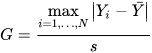

Here, \( G \) is the Grubbs test statistic. \( Y_i \) represents each data point, \( \bar{Y} \) is the mean (average) of all the data, and \( s \) is the standard deviation. 

This formula helps us measure how far each data point is from the average. If this number (the Grubbs test statistic) is really big compared to the others, it might mean we've got an outlier.

In [12]:
def grubbs_test(x):
    n = len(x)    
    mean_x = np.mean(x) #mean
    sd_x = np.std(x) #STD
    numerator = max(abs(x - mean_x)) #numerator of the Grubbs test statistic
    
    # Calculate the Grubbs test statistic
    g_calculated = numerator / sd_x
    print("Grubbs Calculated Value:", g_calculated)
    
    # Critical value using the t-distribution
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:", g_critical)
    
    # #compare value with critical value
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")


In [13]:
grubbs_test(df.forehead_width_cm_normalized)
#it should be noted for using grubs test the data should be normalized 

Grubbs Calculated Value: 2.0943806888094736
Grubbs Critical Value: 4.413130183519674
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



#### Disadvantages for Grubbs test  

1. Grubbs' test assumes normality, potentially leading to inaccurate results with non-normal data.
2. It detects one <b>outlier at a time</b>, which can be time-consuming and alter dataset characteristics with iterative removal.
3. Not suitable for small sample sizes (≤6), often identifying most or all data points as outliers.
4. Sensitivity to <b>extreme values</b> may result in incorrect outlier identification.
5. Relies on subjective significance level choice for outlier definition.
6. Effectiveness varies with data distribution, performing better with symmetric distributions.

### Sure, let's jump into Z-score, which is commonly used in statistical analysis to calculate outliers.

Z-score, also known as standard score, is a statistical measure that indicates how many standard deviations a data point is from the mean of a dataset. Imagine we have a set of data, and we want to understand how each individual data point compares to the average value of the entire dataset. Z-score allows us to answer this question by providing a standardized measure of deviation from the mean.

Here's how Z-score works: 
- First, we calculate the mean (average) and standard deviation of the dataset.
- Then, for each data point, we subtract the mean from that data point and divide the result by the standard deviation. This gives us the number of standard deviations that data point is away from the mean.

The formula for calculating Z-score is:
\[ Z = (X- mu) / sigma ]

Where:
- \( Z \) is the Z-score.
- \( X \) is the individual data point.
- \( mu \) is the mean of the dataset.
- \( sigma \) is the standard deviation of the dataset.


<b>*** It should be noted that the data should follow a normal distribution </b><br>
Advantages:
- Z-score allows for the comparison of data points from different datasets.
- It helps identify outliers in the data by flagging data points that are significantly far from the mean.

Disadvantages:
- Z-score assumes that the data is normally distributed, which may not always be the case.
- Outliers in the dataset can heavily influence the mean and standard deviation, impacting the Z-scores of other data points.
- It may not be suitable for skewed distributions or datasets with extreme outliers.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def detect_outliers_z_score(data, threshold=2):
    outliers = []
    mean = np.mean(data)
    std_dev = np.std(data)
    
    for i, x in enumerate(data):
        z_score = (x - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers

In [15]:
data=df.forehead_width_cm 
#Here, we're examining a single column since the other columns contains binary values (1s and 0s).

Percentage of data within ±1 Std: 61.67%
Percentage of data within ±2 Std: 97.40%
Percentage of data within ±3 Std: 100.00%


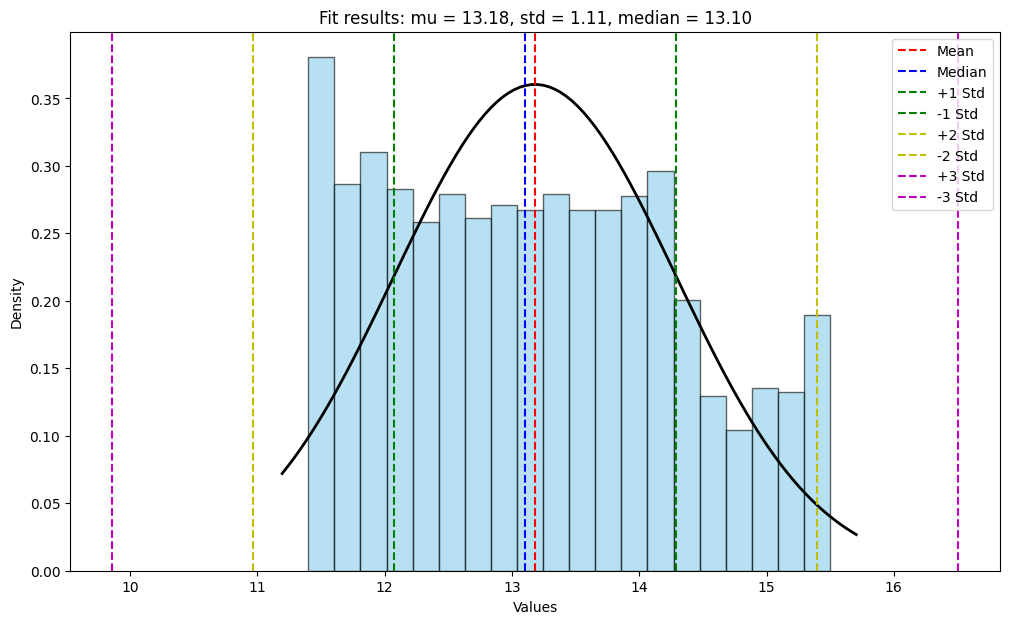

In [16]:
# Fit a normal distribution to the data
mu, std = norm.fit(data)
median = np.median(data)

# ±1, ±2, and ±3 standard deviations
within_1std = np.sum(np.abs(data - mu) <= std) / len(data) * 100
within_2std = np.sum(np.abs(data - mu) <= 2*std) / len(data) * 100
within_3std = np.sum(np.abs(data - mu) <= 3*std) / len(data) * 100

plt.figure(figsize=(12, 7))
plt.hist(data, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')

#normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Mean ,median and 1,2,3 STD
plt.axvline(mu, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='b', linestyle='--', label='Median')
plt.axvline(mu + std, color='g', linestyle='--', label='+1 Std')
plt.axvline(mu - std, color='g', linestyle='--', label='-1 Std')
plt.axvline(mu + 2*std, color='y', linestyle='--', label='+2 Std')
plt.axvline(mu - 2*std, color='y', linestyle='--', label='-2 Std')
plt.axvline(mu + 3*std, color='m', linestyle='--', label='+3 Std')
plt.axvline(mu - 3*std, color='m', linestyle='--', label='-3 Std')

# % for the std
print(f"Percentage of data within ±1 Std: {within_1std:.2f}%")
print(f"Percentage of data within ±2 Std: {within_2std:.2f}%")
print(f"Percentage of data within ±3 Std: {within_3std:.2f}%")

plt.title('Fit results: mu = {:.2f}, std = {:.2f}, median = {:.2f}'.format(mu, std, median))
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

In summary, our analysis using Z-scores reveals that:

Around 62% of the data falls within one standard deviation from the mean, showing a moderate spread around the average.<br>
A significant portion, about 97%, lies within two standard deviations, indicating a high level of consistency in the dataset.<br>
Notably, all data points, 100%, are within three standard deviations, suggesting a tightly clustered distribution around the mean.<br><br><br>
The results suggest that the dataset is well-behaved with minimal outliers, providing a clear picture of its statistical characteristics.

Our data appears to somewhat adhere to the 68-95-99 empirical rule.

The outlier Methods of Z-Score Method, Grubbs' Test, Interquartile Range (IQR) Method, and Boxplot Method remain particularly popular due to their simplicity, effectiveness, and widespread applicability.<br>
But the other Outlier methods are Isolation Forest,  DBSCAN Clustering,etc 

In [17]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_cm_normalized
0,1,11.8,6.1,1,0,1,1,Male,-1.247808
1,0,14.0,5.4,0,0,1,0,Female,0.739315
2,0,11.8,6.3,1,1,1,1,Male,-1.247808
3,0,14.4,6.1,0,1,1,1,Male,1.100610
4,1,13.5,5.9,0,0,0,0,Female,0.287696


In [18]:
"""For label encoding, since there is no ordinal relationship among values in the column, 
we'll assign numerical labels to each category for representation."""
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])


In [19]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_cm_normalized
0,1,11.8,6.1,1,0,1,1,1,-1.247808
1,0,14.0,5.4,0,0,1,0,0,0.739315
2,0,11.8,6.3,1,1,1,1,1,-1.247808
3,0,14.4,6.1,0,1,1,1,1,1.100610
4,1,13.5,5.9,0,0,0,0,0,0.287696
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0,0.378020
4997,1,11.9,5.4,0,0,0,0,0,-1.157484
4998,1,12.9,5.7,0,0,0,0,0,-0.254247
4999,1,13.2,6.2,0,0,0,0,0,0.016725


In [20]:
# as there are Same number of values we can rely on Simple Model, most of the times what happens is there is not adequete dat aand we then have to rely on more complex model for better prediction
df['gender'].value_counts()

gender
0    2501
1    2500
Name: count, dtype: int64

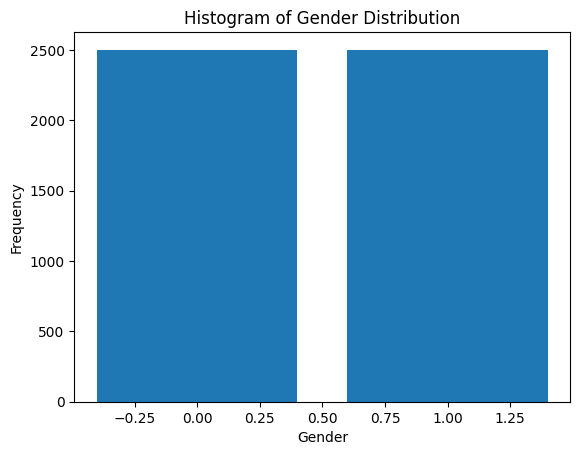

In [21]:
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender Distribution')
plt.show()


In situations where we have a relatively small amount of data and a balanced number of values for each class (like in binary classification where both classes have similar numbers of samples), a simple model such as logistic regression can often provide satisfactory performance.
<br></br>
However, when we encounter scenarios with inadequate data or imbalanced class distributions, relying on more complex models may be necessary to achieve better prediction accuracy. In such cases, simpler models like logistic regression may struggle to capture the underlying patterns in the data effectively.

Complex models, such as decision trees, random forests, gradient boosting, or deep learning models, can handle nonlinear relationships and capture intricate patterns in the data more effectively. These models have more flexibility and capacity to learn complex relationships, making them suitable for situations where simple models may underperform.

It's essential to assess the characteristics of the data, such as its size, complexity, and class distribution, to determine the most appropriate model. While simple models have their advantages in terms of interpretability and computational efficiency, more complex models offer improved predictive performance in scenarios with challenging data characteristics.

<Axes: >

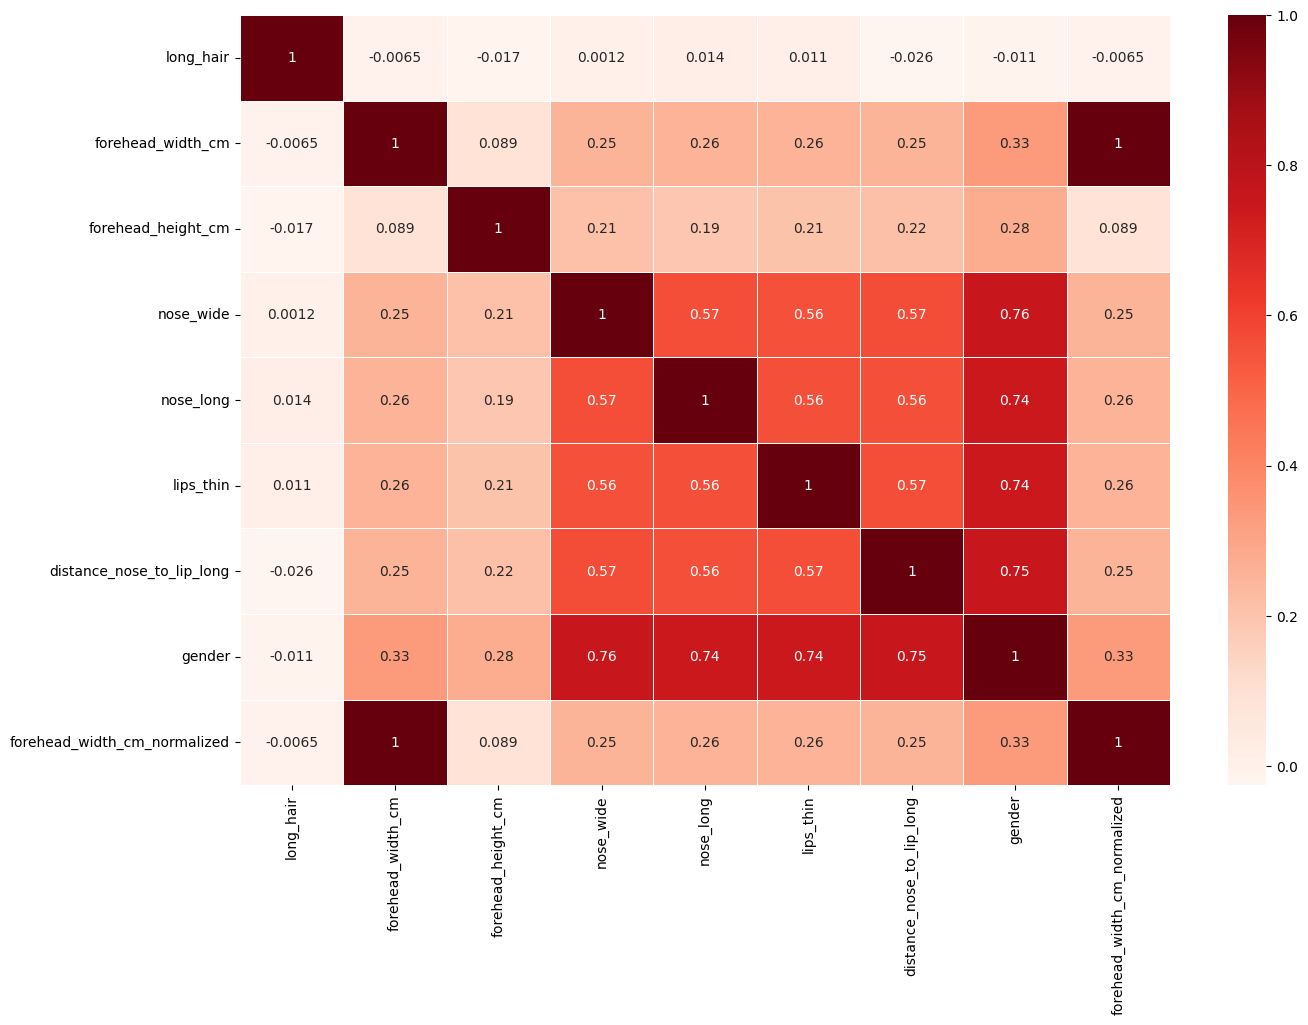

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,linewidths=0.5, cmap="Reds")

In [23]:
df.drop(columns=['forehead_width_cm_normalized'], inplace=True) 
#In the correlation plot, both "forehead_width_cm_normalized" and "forehead_width_cm" show the same value, 
#indicating redundancy. Hence, we can discard one of these columns.

In [24]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


## Let's start Training the model

In [25]:
X=df.drop(['gender'], axis=1)
y=df['gender']
y=pd.DataFrame(y)

In [26]:
## Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [27]:
%%time
#intiating the logistic model
model = LogisticRegression()
model.fit(X_train, y_train) #fitting the model
model.score(X_test, y_test) #scoring the Accuracy of the Model

CPU times: user 120 ms, sys: 95.1 ms, total: 215 ms
Wall time: 63.5 ms


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.972027972027972

Let's enhance the previous code by adjusting the hyperparameters to improve its Accuracy.

Let explains in deatil for Each Hyper-parameter.<br></br>
<b>`Penalty Term`</b>
1. **None**:
   - Think of it as saying "I don't want to punish my model for having big or unnecessary coefficients." We'd choose this if we're confident that our data is clean and our model won't run into problems like overfitting.

2. **'l2'**:
   - Basically L2 heps us to avoid getting too carried away with any one feature. It's like saying, "Hey, try to keep your coefficients in check." We'd go for this if we're not sure which features are super important, but we want to make sure no single one dominates the others.

3. **'l1'**:
   - This one's like a strict teacher who says, "You're only allowed to focus on the really important stuff." It pushes our model to ignore less useful features by setting their coefficients to zero. So use this when we suspect some features are noise or not that relevant to our prediction.

4. **'elasticnet'**:
   - It's like having both the gentle nudge and the strict teacher in the room. Elastic Net combines the best of 'l1' and 'l2'. It's useful when we have a ton of features and we suspect some might be correlated or redundant. This way, we get the benefits of both worlds: feature selection and coefficient control.
   
-----------------------------------------------------------------------------
 ### Basically most of the time its a best practise to do the grid search along with cross-valdiation, to find the best fit.
 
 Now talking about the <b>`"C"`</b> term <br></br>
<b> 'C : float, default=1.0'</b>
  - So its like a KNOB we cna tune for; small the term stricter the regularization,while larger is opposite.So, if we want our model to generalize well and not get too hung up on the training data, you'd go for a smaller value. But if we're okay with our model getting really close to the training data, even at the risk of overfitting, we might choose a larger value.
  -------------------------------------------------------------------
  ### The Main Question which Solver to use
<b>`solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’ ``</b>

**'lbfgs':**
- This is a good default choice for many situations. It's reliable and works well for small to medium-sized datasets. It's not the fastest for very large datasets, but it's generally quite efficient and stable.

**'liblinear':**
-  If we're working with small to medium-sized datasets and we're dealing with a binary classification problem then liblinear is good. It's efficient and particularly suitable for problems with a large number of features.

**'newton-cg':**
- This solver is good for <b>multiclass</b> problems and works well for medium-sized datasets. It handles multinomial loss and is generally reliable.

**'newton-cholesky':**
- Use this when we have a lot more samples than features, especially if we're dealing with one-hot encoded categorical features with rare categories. However, it's limited to <b>binary</b> classification or one-versus-rest for multiclass problems. Be cautious with memory usage because it scales quadratically with the number of features.

**'sag':**
- This is great for large datasets as it's faster than some other solvers. However, it's particularly effective when features have similar scales. It's suitable for both binary and multiclass problems.

**'saga':**
- Similar to 'sag', but it supports more penalties like elastic net regularization. It's also fast and suitable for datasets of various sizes, but again, it converges faster when features have similar scales.
-------------------------------------------------
<br></br>
Now Lets Come to <b>`dual :bool, default=False'`</b>
Lets say if we have a dataset with pictures of animals, and we want to build a model to classify them into cats & dogs based on thier features lets say; fur, ear , tail length ,etc.

- So what <b>DUAL TRUE</b> does is , tos olve the issue it would first take the features in pairs or some other combination to solve and explore it. his approach works well when you have many features (like fur length, ear shape, etc.) compared to the number of pictures you have.
<br></br>
- But when <b>DUAL is FALSE</b>, it solve the puzzle by taking each feature one at a time.This approach is useful when we have a lot of pictures (examples) compared to the number of features, and we want to focus on how each feature contributes individually to the classification.

------------------------------------------
When Choosing Class Weight
<b>`class_weight:dict or ‘balanced’, default=None
`</b>
    - class_weight parameter allows us to address class imbalance in classification tasks. When set to 'balanced', it automatically adjusts class weights inversely proportional to their frequencies in the input data. This helps the model give more importance to minority classes, leading to better performance on imbalanced datasets. If set to None, all classes are treated equally, which might lead to biased predictions towards the majority class.


In [28]:
param_grid = {
    
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    # if you still confused with the data, at the end we are human
    #so the best is do the grid search, as we are doing. Based on my knoweledge l2 is good for this Dataset.
    'C': [0.0001, 0.01, 0.1, 1, 10],  
    # Regularization parameter, choose base on how you want the regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    # so based on our binary classication i have selected these solvers
    'max_iter': [100,1000], # Default is 100, i would usaully use Default option, if the dataset is complex try to increase it 
    'dual': [True],  #For Our case DUAL it is TRUE
   # 'fit_intercept': [True, False],  # Whether to fit the intercept or not
  #  'intercept_scaling': [1, 2, 3],  # Scaling of the intercept
    #'class_weight': [None, 'balanced'],  # Class weights
   # 'warm_start': [True, False],  # Reuse the solution of the previous call
  'random_state': [42],  # Random seed
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
    #'verbose': [3]  # For details use this like optimzation bar, progress bar
}

In [29]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings


# Ignore all warnings
warnings.filterwarnings("ignore")

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=12)  # 12-fold cross-validation
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
# Predictions
y_pred = best_model.predict(X_test)
# Print results
print(f"Best Hyperparameters: {best_params}")
print(f"Cross-Validation Best Score: {best_score:.4f}")
print(f"Test Set Accuracy with Best Model: {test_score:.4f}")

Best Hyperparameters: {'C': 10, 'dual': True, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001}
Cross-Validation Best Score: 0.9685
Test Set Accuracy with Best Model: 0.9730
CPU times: user 45.2 s, sys: 296 ms, total: 45.5 s
Wall time: 45.3 s


In [30]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       507
           1       0.98      0.97      0.97       494

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

Confusion Matrix:
[[496  11]
 [ 16 478]]


We've seen a nice jump in accuracy from 96.85% to 97.3% with our logistic classification after tuning the parameters. That's definitely something to be pleased about. In the next notebook, I'll be experimenting with different models and their hyperparameters, so keep an eye out for that.

And when YOU revisit logistic regression next time, even a modest 0.2% increase in accuracy will be a great accomplishment worth striving for.

<b>`And remember, don't feel demotivated if your algorithm doesn't achieve groundbreaking success. Consider this: a mere 0.1% improvement in accuracy in cancer detection algorithms could translate to correctly identifying more cases in their early stages. This could result in timely treatment and potentially save lives.`</b>
    <br></br>
It's always about finding the best PATH.